In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

c:\Users\173ch\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
data = pd.read_excel('datas\Spotify_data.xlsx')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


1)Age - 사용자의 연령대

2)Gender - 사용자의 성별

3)spotify_usage_period - 스포티파이 사용기간

4)spotify_listening_device - 주로 재생하는 기기 

5)spotify_subscription_plan - 사용하는 구독 요금제

6)premium_sub_willingness - 향후 프리미엄 구독을 사용하거나, 계속 유지할 계획 여부

7)preffered_premium_plan - 지불할 의향이 있는 프리미엄 구독료

8)preferred_listening_content - 선호하는 컨텐츠

9)fav_music_genre - 자주 즐겨듣는 음악 장르

10)music_time_slot - 주로 음악을 듣는 시간대

11)music_Influencial_mood - 음악을 선택하는데 강력한 영향을 주는 분위기 요소

12)music_lis_frequency - 주로 음악을 듣는 빈도(상황)

13)music_expl_method - 새로운 음악을 찾는 방법

14)music_recc_rating - 스포티파이의 음악 추천 시스템에 대한 평가 점수

15)pod_lis_frequency - 팟캐스트를 청취하는 빈도

16)fav_pod_genre - 주로 듣는 팟캐스트 장르 

17)preffered_pod_format - 주로 선호하는 팟캐스트 형식

18)pod_host_preference - 알려지지 않은 인물과 유명 인물 중 선호하는 팟캐스트 호스트

19)preffered_pod_duration - 선호하는 팟캐스트의 길이(30분 이내, 30분 이상)

20)pod_variety_satisfaction - 스포티파이 팟캐스트의 다양성과 사용성에 대한 만족도

In [11]:
data.loc[data['Age'] =='6-12','Age'] = '06-12'
# data.loc[data['Age'] =='6-12'] = '06-12' 
# 이렇게 작성하면 Age가 6-12인 행 전체의 값을 다 바꿔버림. 열 지정 필요.

In [12]:
data.isnull().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

# 나이대 별 사용자 수
20-35세의 사용자가 가장 많다

In [13]:
age_data = data.groupby('Age')['Gender'].count()
age_data

Age
06-12      3
12-20     71
20-35    422
35-60     23
60+        1
Name: Gender, dtype: int64

c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


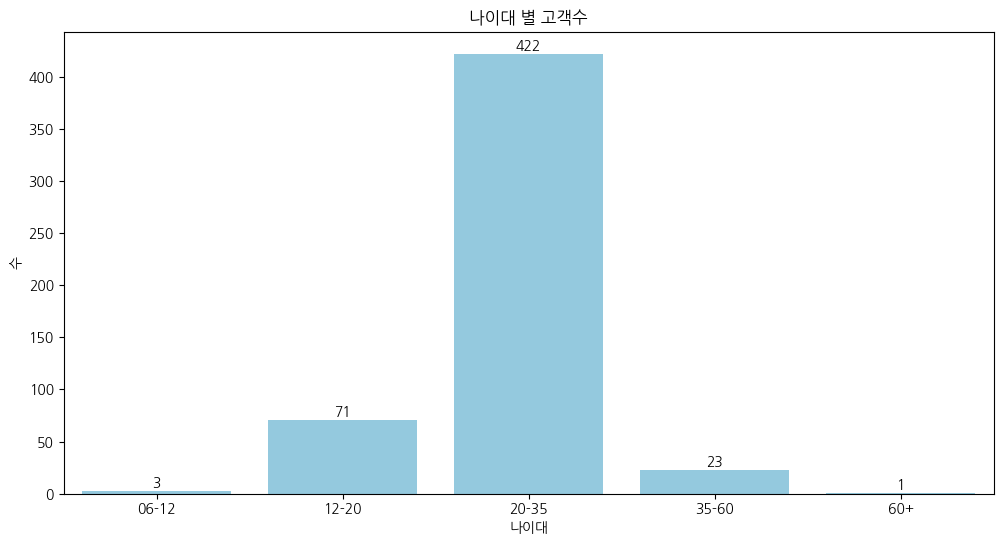

In [14]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=age_data.index, y=age_data.values, color='skyblue')

# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('나이대 별 고객수')
plt.xlabel('나이대')
plt.ylabel('수')
plt.xticks(rotation=0)
plt.show()

# 성별에 따른 사용자 수
여성이 많이 이용하는 어플

In [58]:
gender_data = data['Gender'].value_counts()

# 구독 방식 별 사용자 수
대부분 광고가 포함된 무료 방식을 이용

In [52]:
sub_data = data['spotify_subscription_plan'].value_counts()

c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


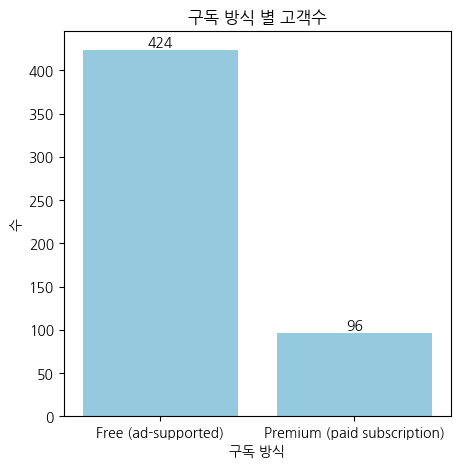

In [56]:
# Plotting the bar graph
plt.figure(figsize=(5, 5))
ax3 = sns.barplot(x=sub_data.index, y=sub_data.values, color='skyblue')

# Display the values on top of the bars
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('구독 방식 별 고객수')
plt.xlabel('구독 방식')
plt.ylabel('수')
plt.xticks(rotation=0)
plt.show()

# 선호하는 음악 장르별 사용자 수
사용자들은 멜로디 음악을 가장 많이 듣는 것으로 나타남

여성 유저가 많은 것에 영향을 받지는 않았을까?

In [30]:
fav_m_data=data['fav_music_genre'].value_counts()
fav_m_data

fav_music_genre
Melody                       259
classical                     87
Pop                           85
Rap                           55
Electronic/Dance              16
All                            6
Rock                           4
Kpop                           4
Classical & melody, dance      2
Old songs                      1
trending songs random          1
Name: count, dtype: int64

c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


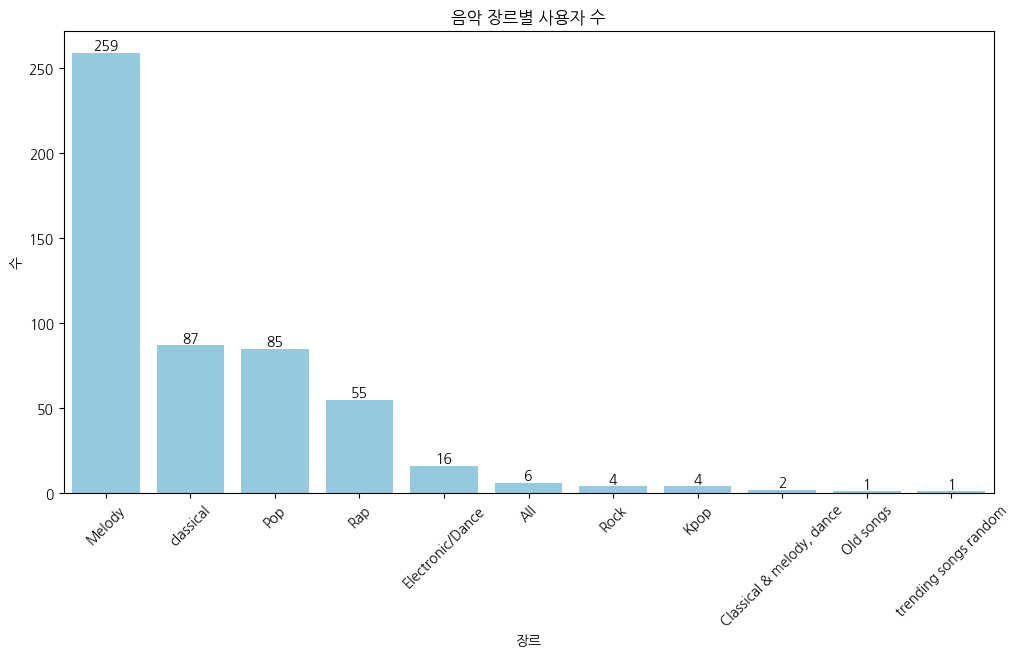

In [87]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=fav_m_data.index, y=fav_m_data.values, color='skyblue')

# Display the values on top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('음악 장르별 사용자 수')
plt.xlabel('장르')
plt.ylabel('수')
plt.xticks(rotation=45)
plt.show()

### 여성이 선호하는 장르와 남성이 선호하는 장르

In [136]:
female_fav_m_data = data[data['Gender']=='Female']['fav_music_genre'].value_counts()
male_fav_m_data = data[data['Gender']=='Male']['fav_music_genre'].value_counts()
print("여성 선호 장르별 수\n", female_fav_m_data, '\n\n')
print("남성 선호 장르별 수\n", male_fav_m_data)

여성 선호 장르별 수
 fav_music_genre
Melody                       217
Pop                           61
classical                     58
Rap                           35
Electronic/Dance              12
Kpop                           4
All                            3
Classical & melody, dance      1
Name: count, dtype: int64 


남성 선호 장르별 수
 fav_music_genre
Melody                       41
Pop                          23
classical                    23
Rap                          14
Rock                          4
Electronic/Dance              3
All                           3
Classical & melody, dance     1
Old songs                     1
trending songs random         1
Name: count, dtype: int64


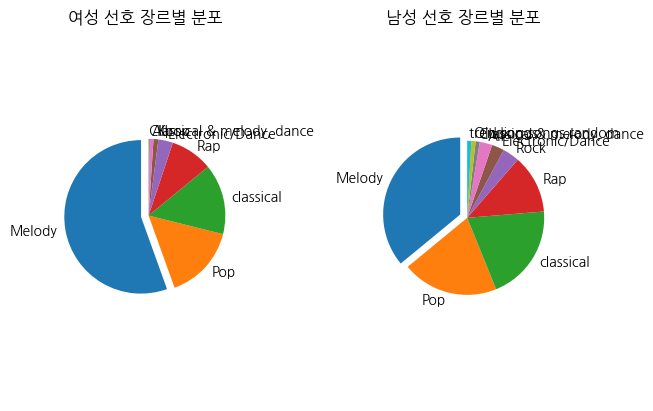

In [142]:
exp1 = [0.1, 0, 0, 0, 0, 0, 0, 0]
plt.subplot(1, 2, 1)
plt.pie(female_fav_m_data.values, labels=female_fav_m_data.index, explode=exp1, startangle=90)
# plt.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('여성 선호 장르별 분포')

exp2 = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.subplot(1, 2, 2)
plt.pie(male_fav_m_data.values, labels=male_fav_m_data.index, explode=exp2, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('남성 선호 장르별 분포')

plt.subplots_adjust(wspace=0.8)

plt.show()

확실히 Melody는 여성이 남성보다 많이 듣는 장르이다.

남성은 여성에 비히 상대적으로 듣는 장르의 폭이 넓다.